In [15]:
import keras
from keras import layers
from keras.datasets import mnist
from keras.utils import plot_model
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

*Let's prepare out input data first. We will normalize all the values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.*

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# normalizing the values between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Converting to 1D Array (Vector respresentation)
x_train = x_train.reshape(-1, np.prod(x_train.shape[1:]))
x_test = x_test.reshape(-1, np.prod(x_test.shape[1:]))

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Our Images have 784 features.

##### Architecture of Deep Autoencoder which is reducing the dimension from 784 to 2.

In [20]:
encoding_dim = 2
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(512, activation ='relu')(input_img)
encoded = layers.Dense(128, activation = 'relu')(encoded)
encoded = layers.Dense(64, activation ='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'relu')(encoded)

#encoder
encoder = keras.Model(input_img, encoded)

encoding_input = keras.Input(shape=(encoding_dim,))

decoded = layers.Dense(64, activation ='relu')(encoded)
decoded = layers.Dense(128, activation ='relu')(decoded)
decoded = layers.Dense(512, activation ='relu')(decoded)
decoded = layers.Dense(784, activation ='sigmoid')(decoded)



DeepAutoEncoder = keras.Model(input_img, decoded)
DeepAutoEncoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#decoder
decoder_layer1 = DeepAutoEncoder.layers[-4]
decoder_layer2 = DeepAutoEncoder.layers[-3]
decoder_layer3 = DeepAutoEncoder.layers[-2]
decoder_layer4 = DeepAutoEncoder.layers[-1]

decoder = keras.Model(encoding_input, decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoding_input)))))

DeepAutoEncoder.fit(x_train,x_train,
                    epochs = 100,
                    batch_size = 256,
                    shuffle = True,
                    validation_data = (x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 144us/step - loss: 0.2763 - val_loss: 0.2489
Epoch 2/100
60000/60000 [==============================] - 8s 141us/step - loss: 0.2442 - val_loss: 0.2378
Epoch 3/100
60000/60000 [==============================] - 8s 139us/step - loss: 0.2345 - val_loss: 0.2304
Epoch 4/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.2288 - val_loss: 0.2271
Epoch 5/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.2250 - val_loss: 0.2239
Epoch 6/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.2193 - val_loss: 0.2091
Epoch 7/100
60000/60000 [==============================] - 9s 144us/step - loss: 0.1991 - val_loss: 0.1945
Epoch 8/100
60000/60000 [==============================] - 8s 142us/step - loss: 0.1922 - val_loss: 0.1929
Epoch 9/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.1898 - val_

60000/60000 [==============================] - 8s 140us/step - loss: 0.1635 - val_loss: 0.1658
Epoch 77/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.1634 - val_loss: 0.1660
Epoch 78/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.1631 - val_loss: 0.1655
Epoch 79/100
60000/60000 [==============================] - 8s 139us/step - loss: 0.1627 - val_loss: 0.1653
Epoch 80/100
60000/60000 [==============================] - 8s 138us/step - loss: 0.1625 - val_loss: 0.1658
Epoch 81/100
60000/60000 [==============================] - 8s 138us/step - loss: 0.1647 - val_loss: 0.1669
Epoch 82/100
60000/60000 [==============================] - 8s 138us/step - loss: 0.1639 - val_loss: 0.1654
Epoch 83/100
60000/60000 [==============================] - 8s 137us/step - loss: 0.1626 - val_loss: 0.1655
Epoch 84/100
60000/60000 [==============================] - 8s 138us/step - loss: 0.1629 - val_loss: 0.1656
Epoch 85/100
60000/60000 [===============

In [21]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

<IPython.core.display.Javascript object>


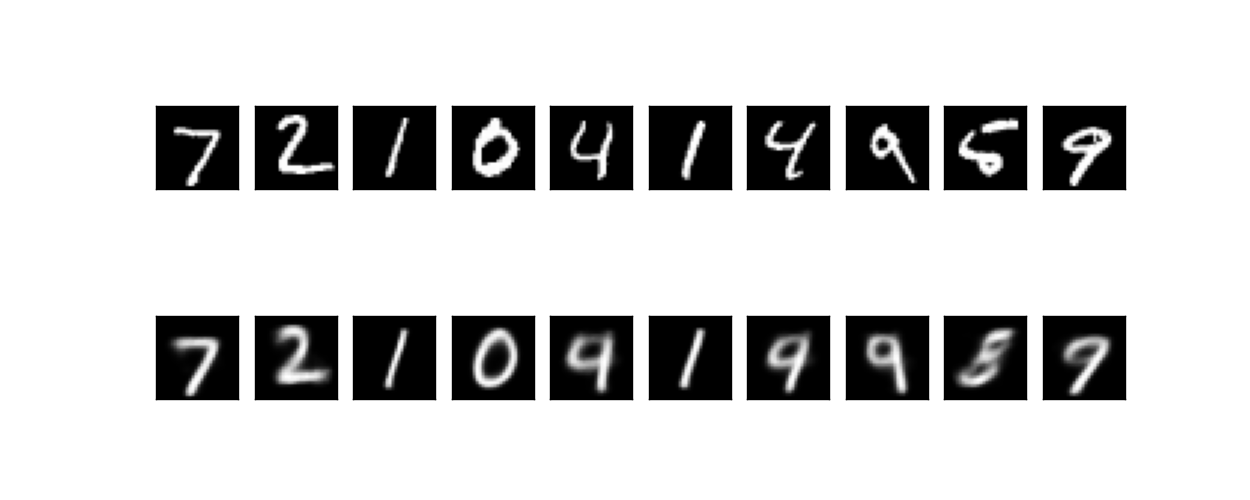

In [22]:
n = 10  # How many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Visualizing the latent space

<IPython.core.display.Javascript object>


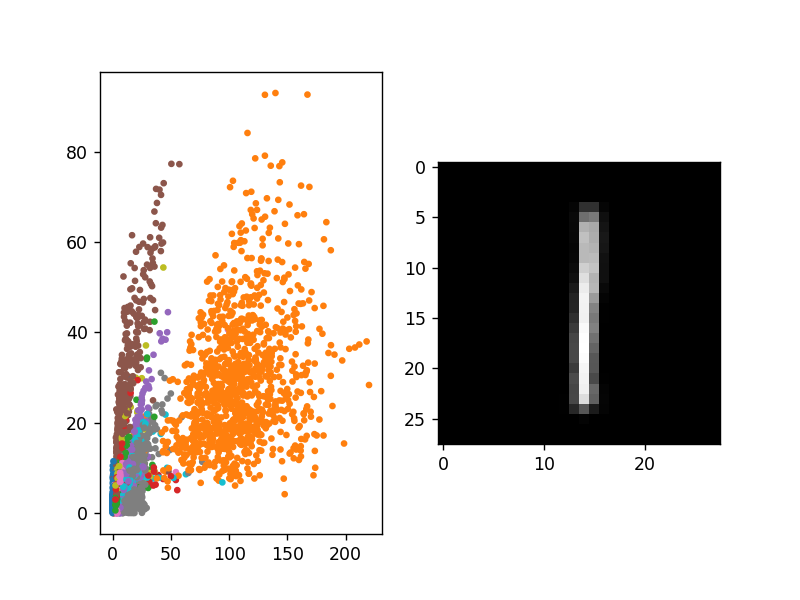

In [23]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(x=encoded_imgs[:,0],y=encoded_imgs[:,1], c = y_test, s =8, cmap='tab10')

def onclick(event):
    global flag
    ix, iy = event.xdata, event.ydata
    latent_vector = np.array([[ix, iy]])
    
    decoded_img = decoder.predict(latent_vector)
    decoded_img = decoded_img.reshape(28, 28)
    ax[1].imshow(decoded_img, cmap='gray')
    plt.draw()

# motion_notify_event
cid = fig.canvas.mpl_connect('motion_notify_event', onclick)
plt.show()